In [51]:
# Import necessary libraries
import pandas as pd
import re
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'https://raw.githubusercontent.com/jamesiswanto/GDGoC-Info-Session-Keyword-Extraction/refs/heads/development/InfoSessionFeedback.csv'
df = pd.read_csv(file_path)

In [52]:
# Print all column names
print(df.columns)

Index(['Timestamp', 'Full Name\r\nNama Panjang ', 'NPM ', 'Major\r\nJurusan',
       'Are you a member of GDGoC ? \r\n\r\nApakah kamu Member dari GDGoC ? ',
       'How satisfied are you with the overall Info Session 2024 activity?\r\n\r\nBagaimana tingkat kepuasanmu terhadap keseluruhan kegiatan Info \r\nSession 2024',
       'How much do you agree that this Info Session meeting went smoothly and conducively?\r\n\r\nPada pertemuan Info Session ini, Apakah berjalan lancar dan kondusif ',
       'How do you assess the quality of the material delivery by Kak Raihan and Kak Affa?\r\n\r\nBagaimana penilaian kamu terhadap kualitas penyampaian materi oleh Kak Raihan dan Kak Affa',
       'How would you rate the duration of today's Info Session? \r\nBagaimana penilaian kamu terhadap durasi Info Session hari ini?',
       'Feedback and suggestions for the Info Session 2024  \r\n\r\nKritik dan saran untuk Info Session 2024'],
      dtype='object')


In [53]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

# Define the feedback column
column_name = 'Feedback and suggestions for the Info Session 2024 Kritik dan saran untuk Info Session 2024'

# Combine feedback text into a list of responses
feedback_text = df[column_name].dropna().tolist()

In [54]:
# Function to clean individual feedback entries
def clean_feedback(text):
    # Remove unnecessary whitespace and special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.strip()  # Trim leading/trailing spaces
    return text

# Clean all feedback entries
cleaned_feedback = [clean_feedback(text) for text in feedback_text]

In [55]:
# Clean all feedback entries
cleaned_feedback = [clean_feedback(text) for text in feedback_text]

# Summarize feedback by categories
feedback_summary = defaultdict(list)

# Define keywords for categories
categories = {
    'Sound/Audio': ['suara', 'speaker', 'mic', 'audio', 'mendem', 'terdengar'],
    'Consumables': ['snack', 'konsumsi', 'makanan', 'sediakan'],
    'Duration': ['durasi', 'waktu', 'panjang', 'pendek', 'perpanjang'],
    'Interactivity': ['ice breaking', 'interaktif', 'pertanyaan', 'games', 'aktivitas'],
    'Speakers': ['narasumber', 'pemateri', 'pembicara', 'tambah'],
    'Session Management': ['waktu', 'manajemen', 'terlambat', 'sesuai'],
    'Q&A': ['tanya jawab', 'QnA', 'sesi tanya jawab'],
    'Atmosphere': ['meriah', 'seru', 'asik', 'menarik'],
    'Technical Issues': ['glitch', 'teknis', 'powerpoint', 'gambar', 'audio', 'masalah'],
    'Other Suggestions': ['konsultasi', 'sertifikat', 'bingkisan', 'merchandise', 'saran']
}

In [72]:
# Categorize and summarize feedback
feedback_summary = defaultdict(list)

for feedback in cleaned_feedback:
    categorized = False
    for category, keywords in categories.items():
        if any(keyword in feedback.lower() for keyword in keywords):
            feedback_summary[category].append(feedback)
            categorized = True
            break
    if not categorized:
        feedback_summary['Other Suggestions'].append(feedback)

In [73]:
# Create a concise summary for each category
concise_feedback_summary = {}

for category, feedbacks in feedback_summary.items():
    # Use a set to collect unique phrases or points
    points = set()
    for feedback in feedbacks:
        # Split feedback into words or short phrases
        words = feedback.lower().split()
        for keyword in categories[category]:
            if keyword in feedback.lower():
                points.add(feedback)  # Add the whole feedback if the keyword is relevant
    concise_feedback_summary[category] = list(points)

In [74]:
# Display concise feedback summary
print("Concise Feedback and Suggestions Summary:")
for category, feedbacks in concise_feedback_summary.items():
    print(f"\n{category}:")
    for i, feedback in enumerate(feedbacks, start=1):
        print(f"  {i}. {feedback}")

# Combine all concise feedback text for word cloud
concise_feedback_text = ' '.join(
    ' '.join(feedback for feedback in feedbacks) for feedbacks in concise_feedback_summary.values()
)

Concise Feedback and Suggestions Summary:

Other Suggestions:
  1. sarannya game yg maju nya kurangg euforianya
  2. Tidak ada kritik saran. Kerenn acaranya, banyakin acara offline kak
  3. Kritik dan saran nya adalah mungkin bisa agak diperlama lagi session nya dan diperbanyak lagi event event kedepannya
  4. Tidak ada kritik maupun saran karena menurut saya acara sudah berjalan dengan baik tanpa ada trouble

Atmosphere:
  1. Semoga bisa lebih seru dan menarik lagi juga bisa memberikan kita wawasan yang lebih
  2. Kegiatan hari ini sangat menarik
  3. SERU BANGETTTTTT
  4. semoga bisa lebih meriah
  5. Untuk saya pribadi sudah bagus tetapi saran dari saya untuk openingnya mungkin lebih meriah dengan bakat nyanyi dari member atau panitia
  6. seruu, penjelasannya juga mudah dipahami. mungkin untuk next event penyampaian materi nya lebih banyak lagi yang dibahas
  7. Semoga untuk acara sesi selanjutnya tetep seru dan bisa menginspirasi. Kalau nanya dapat bingkisan plisss :)
  8. acara s

In [75]:
# Generate a word cloud for concise feedback
wordcloud_concise = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    stopwords=['-', 'tidak ada', 'gak ada', 'dan', 'terimakasih', 'untuk', 'lagi', 'terima kasih',
               'saran', 'lebih', 'bisa', 'karena', 'di', 'dari']
).generate(concise_feedback_text)

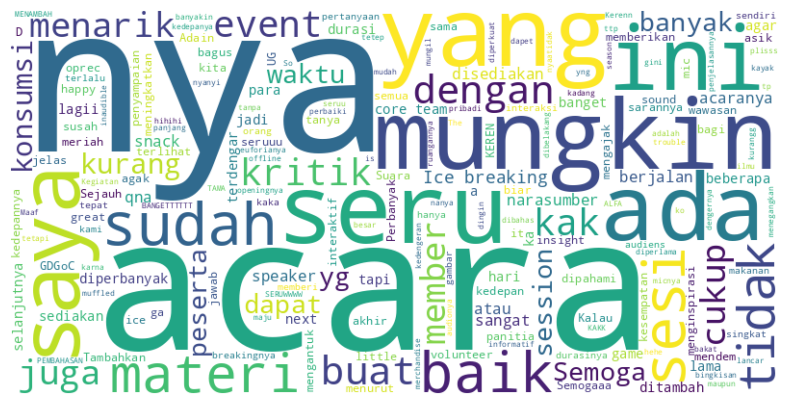

In [76]:
# Display the concise word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_concise, interpolation='bilinear')
plt.axis('off')
plt.show()